In [18]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

from keras import layers, models, backend, optimizers, regularizers, Model, losses

In [3]:
# Train and Test Image Directories
train_img_dir = "D:Development/Data_Science_Datasets/Monkeypox_skinlesion/Original/Train/"
test_img_dir = "D:Development/Data_Science_Datasets/Monkeypox_skinlesion/Original/Test/"
val_img_dir = "D:Development/Data_Science_Datasets/Monkeypox_skinlesion/Original/Val/"

# Basic variables
val_batch_size = 51
val_img_height = 56
val_img_width = 56
val_validation_split = None
val_subset = None
val_shuffle = False
val_labels = 'inferred'
val_seed = 56
val_channels = 3
val_interpolation = 'gaussian'
val_steps_per_epochs = 95
val_learning_rate = 0.0001
val_train_img_height = 224
val_train_img_width = 224

In [4]:
train_img_ds = tf.keras.utils.image_dataset_from_directory(
    train_img_dir,
    validation_split = val_validation_split,
    subset = val_subset,
    seed = val_seed,
    image_size=(val_train_img_height, val_train_img_width),
    batch_size = None, 
    shuffle = val_shuffle,
    labels = val_labels,
    interpolation = val_interpolation)

Found 2156 files belonging to 2 classes.


In [5]:
test_img_ds = tf.keras.utils.image_dataset_from_directory(
    test_img_dir,
    validation_split = val_validation_split,
    subset = val_subset,
    seed = val_seed,
    image_size=(val_img_height, val_img_width),
    batch_size = val_batch_size, 
    shuffle = val_shuffle,
    labels = val_labels,
    interpolation = val_interpolation)

Found 45 files belonging to 2 classes.


In [6]:
val_img_ds = tf.keras.utils.image_dataset_from_directory(
    val_img_dir,
    validation_split = val_validation_split,
    subset = val_subset,
    seed = val_seed,
    image_size=(val_train_img_height, val_train_img_width),
    batch_size = None, 
    shuffle = val_shuffle,
    labels = val_labels,
    interpolation = val_interpolation)

Found 406 files belonging to 2 classes.


In [7]:
train_images = []
train_labels = []

for image_data, labels_data in train_img_ds:
    train_images.append(image_data.numpy())
    train_labels.append(labels_data)    

In [8]:
val_images = []
val_labels = []

for image_data, labels_data in val_img_ds:
    val_images.append(image_data.numpy())
    val_labels.append(labels_data)

In [9]:
x_train = np.asarray(train_images)
x_val = np.asarray(val_images)

In [10]:
encoder = models.Sequential()

encoder.add(layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=x_train.shape[1:]))
encoder.add(layers.MaxPooling2D(2, strides=2))

encoder.add(layers.Conv2D(64, 3, strides=1, padding='same', activation='relu'))
encoder.add(layers.MaxPooling2D(2, strides=2))

encoder.add(layers.Conv2D(128, 3, strides=1, padding='same', activation='relu'))
encoder.add(layers.MaxPooling2D(2, strides=2))

encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [11]:
decoder = models.Sequential()

decoder.add(layers.Conv2D(128, 3, strides=1, padding='same', activation='relu', input_shape=encoder.output.shape[1:]))
decoder.add(layers.UpSampling2D(2))

decoder.add(layers.Conv2D(16, 3, strides=1, padding='same', activation='relu'))
decoder.add(layers.UpSampling2D(2))

decoder.add(layers.Conv2D(3, 3, strides=1, padding='same', activation='relu'))
decoder.add(layers.UpSampling2D(2))

decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 up_sampling2d (UpSampling2D  (None, 56, 56, 128)      0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 56, 56, 16)        18448     
                                                                 
 up_sampling2d_1 (UpSampling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 3)       435       
                                                                 
 up_sampling2d_2 (UpSampling  (None, 224, 224, 3)     

In [14]:
conv_autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.outputs))
conv_autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856 

In [15]:
conv_autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.outputs))
conv_autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       7385

In [19]:
conv_autoencoder.compile(optimizer='adam', loss=losses.mean_squared_error)

In [21]:
history = conv_autoencoder.fit(x_train, x_train, batch_size = val_batch_size, epochs=50, validation_data=(x_val, x_val))

Epoch 1/50
43/43 [==============================] - 169s 4s/step - loss: 6337.2656 - val_loss: 961.0909
Epoch 2/50
43/43 [==============================] - 170s 4s/step - loss: 593.8520 - val_loss: 418.5085
Epoch 3/50
43/43 [==============================] - 175s 4s/step - loss: 336.9705 - val_loss: 262.6630
Epoch 4/50
43/43 [==============================] - 175s 4s/step - loss: 217.7607 - val_loss: 218.0819
Epoch 5/50
43/43 [==============================] - 166s 4s/step - loss: 158.5281 - val_loss: 152.1689
Epoch 6/50
43/43 [==============================] - 166s 4s/step - loss: 149.9108 - val_loss: 161.9470
Epoch 7/50
43/43 [==============================] - 166s 4s/step - loss: 128.1797 - val_loss: 127.4305
Epoch 8/50
43/43 [==============================] - 169s 4s/step - loss: 121.1181 - val_loss: 153.6999
Epoch 9/50
43/43 [==============================] - 165s 4s/step - loss: 116.2612 - val_loss: 123.6837
Epoch 10/50
43/43 [==============================] - 165s 4s/step - loss

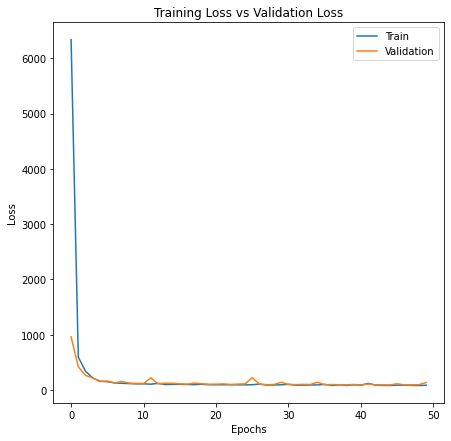

In [22]:
fig, axs = plt.subplots(figsize=(7,7))

axs.plot(history.history['loss'])
axs.plot(history.history['val_loss'])
axs.title.set_text('Training Loss vs Validation Loss')
axs.set_xlabel('Epochs')
axs.set_ylabel('Loss')
axs.legend(['Train','Validation'])

In [23]:
constr_data = []
for train_sample in x_train:
    latent = encoder(np.expand_dims(train_sample,0))
    constructed = decoder(latent)
    constr_data.append(constructed[0]/255)    

In [25]:
train_image_tensor = tf.convert_to_tensor(constr_data)
train_label_tensor = tf.convert_to_tensor(train_labels)

In [26]:
tmp_train_img_tensor = tf.image.resize(train_image_tensor, (val_img_height, val_img_width))

In [27]:
cae_train_ds = tf.data.Dataset.from_tensor_slices((tmp_train_img_tensor, train_label_tensor))

In [28]:
cae_train_ds.element_spec

(TensorSpec(shape=(56, 56, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

In [29]:
cae_train_final_ds = cae_train_ds.batch(batch_size = val_batch_size)

In [30]:
cae_train_final_ds.element_spec

(TensorSpec(shape=(None, 56, 56, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [31]:
test_img_ds.element_spec

(TensorSpec(shape=(None, 56, 56, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [41]:
val_img_final_ds = tf.keras.utils.image_dataset_from_directory(
    val_img_dir,
    validation_split = val_validation_split,
    subset = val_subset,
    seed = val_seed,
    image_size=(val_img_height, val_img_width),
    batch_size = val_batch_size, 
    shuffle = val_shuffle,
    labels = val_labels,
    interpolation = val_interpolation)

Found 406 files belonging to 2 classes.


In [42]:
val_img_final_ds.element_spec

(TensorSpec(shape=(None, 56, 56, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [43]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
norm_train_img_ds = cae_train_final_ds.map(lambda x, y: (normalization_layer(x), y))
norm_test_img_ds = test_img_ds.map(lambda x, y: (normalization_layer(x), y))
norm_val_img_ds = val_img_final_ds.map(lambda x, y: (normalization_layer(x), y))

In [44]:
val_learning_rate = 0.0001

In [60]:
model = models.Sequential()
model.add(layers.Flatten(input_shape = (val_img_height, val_img_width, val_channels)))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation = 'softmax'))

In [61]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 9408)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               4817408   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 2)                 514       
                                                                 
Total params: 4,949,250
Trainable params: 4,949,250
No

In [62]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(val_learning_rate, decay_steps = val_steps_per_epochs, 
                                                             decay_rate=1, staircase=False)

In [63]:
optimizer = optimizers.Adam(lr_schedule)

In [64]:
callback = [tf.keras.callbacks.EarlyStopping(monitor='Sparse_CategoricalCrossentropy', patience=120)]

In [65]:
model.compile(optimizer = optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, name='Sparse_CategoricalCrossentropy'),
                       'accuracy'])

history = model.fit(norm_train_img_ds,  epochs = 30, validation_data=(norm_val_img_ds), 
                    batch_size = val_batch_size, callbacks = callback)

Epoch 1/30
43/43 [==============================] - 2s 38ms/step - loss: 1.2505 - Sparse_CategoricalCrossentropy: 1.2447 - accuracy: 0.4624 - val_loss: 1.3915 - val_Sparse_CategoricalCrossentropy: 1.3848 - val_accuracy: 0.5862
Epoch 2/30
43/43 [==============================] - 1s 31ms/step - loss: 0.7625 - Sparse_CategoricalCrossentropy: 0.7568 - accuracy: 0.4689 - val_loss: 1.8698 - val_Sparse_CategoricalCrossentropy: 1.8607 - val_accuracy: 0.5862
Epoch 3/30
43/43 [==============================] - 1s 31ms/step - loss: 0.8414 - Sparse_CategoricalCrossentropy: 0.8349 - accuracy: 0.3882 - val_loss: 1.8438 - val_Sparse_CategoricalCrossentropy: 1.8349 - val_accuracy: 0.5862
Epoch 4/30
43/43 [==============================] - 1s 32ms/step - loss: 0.8209 - Sparse_CategoricalCrossentropy: 0.8160 - accuracy: 0.3998 - val_loss: 1.8343 - val_Sparse_CategoricalCrossentropy: 1.8254 - val_accuracy: 0.5862
Epoch 5/30
43/43 [==============================] - 1s 32ms/step - loss: 0.8081 - Sparse_Cat

Text(0.5, 1.0, 'MLP CAE 2-Layer Learning-rate 1e-4')

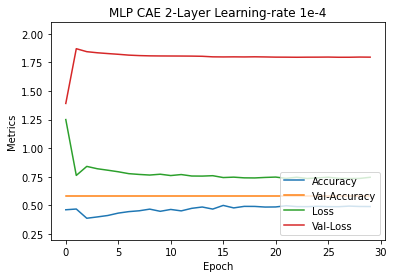

In [67]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val-Accuracy')
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Val-Loss')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.2, 2.1])
plt.legend(loc='lower right')
plt.title('MLP CAE 2-Layer Learning-rate 1e-4')

In [68]:
test_loss, test_sparse_entropy, test_acc = model.evaluate(test_img_ds,  verbose=2)
print(test_acc)

1/1 - 0s - loss: 1.9210 - Sparse_CategoricalCrossentropy: 1.9210 - accuracy: 0.5556 - 160ms/epoch - 160ms/step
0.5555555820465088


In [70]:
test_loss, test_sparse_entropy, test_acc = model.evaluate(norm_test_img_ds,  verbose=2)
print(test_acc)

1/1 - 0s - loss: 1.9287 - Sparse_CategoricalCrossentropy: 1.9287 - accuracy: 0.5556 - 107ms/epoch - 107ms/step
0.5555555820465088


In [72]:
### 3 layers

In [73]:
model13 = models.Sequential()
model13.add(layers.Flatten(input_shape = (val_img_height, val_img_width, val_channels)))
model13.add(layers.Dense(512, activation='sigmoid'))
model13.add(layers.Dropout(0.3))
model13.add(layers.Dense(256, activation='sigmoid'))
model13.add(layers.Dropout(0.3))
model13.add(layers.Dense(128, activation='sigmoid'))
model13.add(layers.Dropout(0.2))
model13.add(layers.Dense(2, activation = 'softmax'))

In [74]:
model13.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 9408)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               4817408   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)              

In [75]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(val_learning_rate, decay_steps = val_steps_per_epochs, 
                                                             decay_rate=1, staircase=False)
optimizer = optimizers.Adam(lr_schedule)
callback = [tf.keras.callbacks.EarlyStopping(monitor='Sparse_CategoricalCrossentropy', patience=120)]

model13.compile(optimizer = optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, name='Sparse_CategoricalCrossentropy'),
                       'accuracy'])

history13 = model13.fit(norm_train_img_ds,  epochs = 30, validation_data=(norm_val_img_ds), 
                    batch_size = val_batch_size, callbacks = callback)

Epoch 1/30
43/43 [==============================] - 2s 39ms/step - loss: 1.2462 - Sparse_CategoricalCrossentropy: 1.2476 - accuracy: 0.4564 - val_loss: 0.6755 - val_Sparse_CategoricalCrossentropy: 0.6753 - val_accuracy: 0.6847
Epoch 2/30
43/43 [==============================] - 2s 36ms/step - loss: 0.7515 - Sparse_CategoricalCrossentropy: 0.7499 - accuracy: 0.5181 - val_loss: 0.7333 - val_Sparse_CategoricalCrossentropy: 0.7312 - val_accuracy: 0.5862
Epoch 3/30
43/43 [==============================] - 2s 35ms/step - loss: 0.7633 - Sparse_CategoricalCrossentropy: 0.7604 - accuracy: 0.4518 - val_loss: 0.7671 - val_Sparse_CategoricalCrossentropy: 0.7646 - val_accuracy: 0.5862
Epoch 4/30
43/43 [==============================] - 1s 35ms/step - loss: 0.7665 - Sparse_CategoricalCrossentropy: 0.7632 - accuracy: 0.4416 - val_loss: 0.7737 - val_Sparse_CategoricalCrossentropy: 0.7711 - val_accuracy: 0.5862
Epoch 5/30
43/43 [==============================] - 1s 35ms/step - loss: 0.7573 - Sparse_Cat

Text(0.5, 1.0, 'MLP CAE 3-Layer Learning-rate 1e-4')

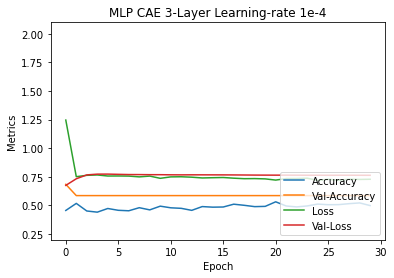

In [76]:
plt.plot(history13.history['accuracy'], label='Accuracy')
plt.plot(history13.history['val_accuracy'], label = 'Val-Accuracy')
plt.plot(history13.history['loss'], label = 'Loss')
plt.plot(history13.history['val_loss'], label = 'Val-Loss')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.2, 2.1])
plt.legend(loc='lower right')
plt.title('MLP CAE 3-Layer Learning-rate 1e-4')

In [77]:
test_loss, test_sparse_entropy, test_acc = model.evaluate(test_img_ds,  verbose=2)
print('Regular :: ', test_acc)

test_loss, test_sparse_entropy, test_acc = model.evaluate(norm_test_img_ds,  verbose=2)
print('Norm :: ', test_acc)

1/1 - 0s - loss: 1.9210 - Sparse_CategoricalCrossentropy: 1.9210 - accuracy: 0.5556 - 61ms/epoch - 61ms/step
Regular ::  0.5555555820465088
1/1 - 0s - loss: 1.9287 - Sparse_CategoricalCrossentropy: 1.9287 - accuracy: 0.5556 - 61ms/epoch - 61ms/step
Norm ::  0.5555555820465088


In [78]:
## Model 4 layers - learning rate 1e-4

In [79]:
model14 = models.Sequential()
model14.add(layers.Flatten(input_shape = (val_img_height, val_img_width, val_channels)))
model14.add(layers.Dense(512, activation='sigmoid'))
model14.add(layers.Dropout(0.3))
model14.add(layers.Dense(256, activation='sigmoid'))
model14.add(layers.Dropout(0.3))
model14.add(layers.Dense(128, activation='sigmoid'))
model14.add(layers.Dropout(0.3))
model14.add(layers.Dense(56, activation='sigmoid'))
model14.add(layers.Dropout(0.2))
model14.add(layers.Dense(2, activation = 'softmax'))

In [81]:
model14.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 9408)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               4817408   
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)              

In [87]:
val_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(val_learning_rate, decay_steps = val_steps_per_epochs, 
                                                             decay_rate=1, staircase=False)
optimizer = optimizers.Adam(lr_schedule)
callback = [tf.keras.callbacks.EarlyStopping(monitor='Sparse_CategoricalCrossentropy', patience=120)]

model14.compile(optimizer = optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, name='Sparse_CategoricalCrossentropy'),
                       'accuracy'])

history14 = model14.fit(norm_train_img_ds,  epochs = 30, validation_data=(norm_val_img_ds), 
                    batch_size = val_batch_size, callbacks = callback)

Epoch 1/30
43/43 [==============================] - 2s 40ms/step - loss: 0.8265 - Sparse_CategoricalCrossentropy: 0.8249 - accuracy: 0.3669 - val_loss: 0.6912 - val_Sparse_CategoricalCrossentropy: 0.6911 - val_accuracy: 0.5862
Epoch 2/30
43/43 [==============================] - 2s 35ms/step - loss: 0.7501 - Sparse_CategoricalCrossentropy: 0.7489 - accuracy: 0.4564 - val_loss: 0.6822 - val_Sparse_CategoricalCrossentropy: 0.6818 - val_accuracy: 0.5862
Epoch 3/30
43/43 [==============================] - 1s 34ms/step - loss: 0.7476 - Sparse_CategoricalCrossentropy: 0.7464 - accuracy: 0.4643 - val_loss: 0.6784 - val_Sparse_CategoricalCrossentropy: 0.6779 - val_accuracy: 0.5862
Epoch 4/30
43/43 [==============================] - 2s 35ms/step - loss: 0.7245 - Sparse_CategoricalCrossentropy: 0.7233 - accuracy: 0.5083 - val_loss: 0.6768 - val_Sparse_CategoricalCrossentropy: 0.6762 - val_accuracy: 0.5862
Epoch 5/30
43/43 [==============================] - 1s 34ms/step - loss: 0.7219 - Sparse_Cat

Text(0.5, 1.0, 'MLP CAE 4-Layer Learning-rate 1e-4')

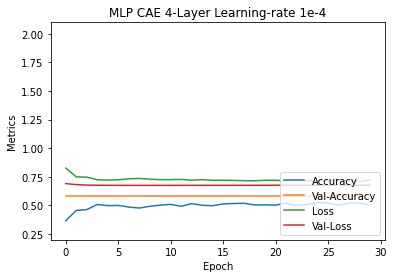

In [88]:
plt.plot(history14.history['accuracy'], label='Accuracy')
plt.plot(history14.history['val_accuracy'], label = 'Val-Accuracy')
plt.plot(history14.history['loss'], label = 'Loss')
plt.plot(history14.history['val_loss'], label = 'Val-Loss')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.2, 2.1])
plt.legend(loc='lower right')
plt.title('MLP CAE 4-Layer Learning-rate 1e-4')

In [105]:
test_loss, test_sparse_entropy, test_acc = model14.evaluate(test_img_ds,  verbose=2)
print(test_acc)

test_loss, test_sparse_entropy, test_acc = model14.evaluate(norm_test_img_ds,  verbose=2)
print(test_acc)

1/1 - 0s - loss: 0.6920 - Sparse_CategoricalCrossentropy: 0.6920 - accuracy: 0.5556 - 66ms/epoch - 66ms/step
0.5555555820465088
1/1 - 0s - loss: 0.6899 - Sparse_CategoricalCrossentropy: 0.6899 - accuracy: 0.5556 - 80ms/epoch - 80ms/step
0.5555555820465088


In [85]:
#Model 2 layer with learning rate 3e-4
model32 = models.Sequential()
model32.add(layers.Flatten(input_shape = (val_img_height, val_img_width, val_channels)))
model32.add(layers.Dense(512, activation='sigmoid'))
model32.add(layers.Dropout(0.3))
model32.add(layers.Dense(256, activation='sigmoid'))
model32.add(layers.Dropout(0.2))
model32.add(layers.Dense(2, activation = 'softmax'))

In [86]:
model32.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 9408)              0         
                                                                 
 dense_21 (Dense)            (None, 512)               4817408   
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 2)                 514       
                                                                 
Total params: 4,949,250
Trainable params: 4,949,250
No

In [95]:
val_learning_rate = 0.0003

In [96]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(val_learning_rate, decay_steps = val_steps_per_epochs, 
                                                             decay_rate=1, staircase=False)
optimizer = optimizers.Adam(lr_schedule)
callback = [tf.keras.callbacks.EarlyStopping(monitor='Sparse_CategoricalCrossentropy', patience=120)]

model32.compile(optimizer = optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, name='Sparse_CategoricalCrossentropy'),
                       'accuracy'])

history32 = model32.fit(norm_train_img_ds,  epochs = 30, validation_data=(norm_val_img_ds), 
                    batch_size = val_batch_size, callbacks = callback)

Epoch 1/30
43/43 [==============================] - 2s 41ms/step - loss: 1.3047 - Sparse_CategoricalCrossentropy: 1.2840 - accuracy: 0.5928 - val_loss: 2.3285 - val_Sparse_CategoricalCrossentropy: 2.3171 - val_accuracy: 0.5862
Epoch 2/30
43/43 [==============================] - 2s 35ms/step - loss: 1.5190 - Sparse_CategoricalCrossentropy: 1.4979 - accuracy: 0.2087 - val_loss: 1.7720 - val_Sparse_CategoricalCrossentropy: 1.7634 - val_accuracy: 0.5862
Epoch 3/30
43/43 [==============================] - 2s 38ms/step - loss: 1.0550 - Sparse_CategoricalCrossentropy: 1.0440 - accuracy: 0.2565 - val_loss: 1.7369 - val_Sparse_CategoricalCrossentropy: 1.7285 - val_accuracy: 0.5862
Epoch 4/30
43/43 [==============================] - 2s 37ms/step - loss: 0.9877 - Sparse_CategoricalCrossentropy: 0.9783 - accuracy: 0.2746 - val_loss: 1.7222 - val_Sparse_CategoricalCrossentropy: 1.7138 - val_accuracy: 0.5862
Epoch 5/30
43/43 [==============================] - 1s 35ms/step - loss: 0.9252 - Sparse_Cat

Text(0.5, 1.0, 'MLP CAE 2-Layer Learning-rate 3e-4')

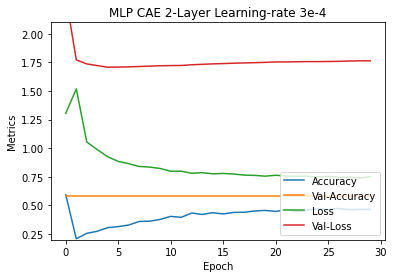

In [97]:
plt.plot(history32.history['accuracy'], label='Accuracy')
plt.plot(history32.history['val_accuracy'], label = 'Val-Accuracy')
plt.plot(history32.history['loss'], label = 'Loss')
plt.plot(history32.history['val_loss'], label = 'Val-Loss')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.2, 2.1])
plt.legend(loc='lower right')
plt.title('MLP CAE 2-Layer Learning-rate 3e-4')

In [104]:
test_loss, test_sparse_entropy, test_acc = model32.evaluate(test_img_ds,  verbose=2)
print(test_acc)

test_loss, test_sparse_entropy, test_acc1 = model32.evaluate(norm_test_img_ds,  verbose=2)
print(test_acc1)

1/1 - 0s - loss: 1.8943 - Sparse_CategoricalCrossentropy: 1.8943 - accuracy: 0.5556 - 61ms/epoch - 61ms/step
0.5555555820465088
1/1 - 0s - loss: 1.8925 - Sparse_CategoricalCrossentropy: 1.8925 - accuracy: 0.5556 - 77ms/epoch - 77ms/step
0.5555555820465088


In [93]:
#Model 3 layer with learning rate 3e-4
model33 = models.Sequential()
model33.add(layers.Flatten(input_shape = (val_img_height, val_img_width, val_channels)))
model33.add(layers.Dense(512, activation='sigmoid'))
model33.add(layers.Dropout(0.3))
model33.add(layers.Dense(256, activation='sigmoid'))
model33.add(layers.Dropout(0.3))
model33.add(layers.Dense(128, activation='sigmoid'))
model33.add(layers.Dropout(0.3))
model33.add(layers.Dense(2, activation = 'softmax'))

In [94]:
model33.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 9408)              0         
                                                                 
 dense_24 (Dense)            (None, 512)               4817408   
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dropout_15 (Dropout)        (None, 128)              

In [99]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(val_learning_rate, decay_steps = val_steps_per_epochs, 
                                                             decay_rate=1, staircase=False)
optimizer = optimizers.Adam(lr_schedule)
callback = [tf.keras.callbacks.EarlyStopping(monitor='Sparse_CategoricalCrossentropy', patience=120)]

model33.compile(optimizer = optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, name='Sparse_CategoricalCrossentropy'),
                       'accuracy'])

history33 = model33.fit(norm_train_img_ds,  epochs = 30, validation_data=(norm_val_img_ds), 
                    batch_size = val_batch_size, callbacks = callback)

Epoch 1/30
43/43 [==============================] - 3s 53ms/step - loss: 1.3692 - Sparse_CategoricalCrossentropy: 1.3533 - accuracy: 0.5139 - val_loss: 0.8088 - val_Sparse_CategoricalCrossentropy: 0.8059 - val_accuracy: 0.5862
Epoch 2/30
43/43 [==============================] - 3s 62ms/step - loss: 0.9994 - Sparse_CategoricalCrossentropy: 0.9899 - accuracy: 0.3145 - val_loss: 0.7579 - val_Sparse_CategoricalCrossentropy: 0.7555 - val_accuracy: 0.5862
Epoch 3/30
43/43 [==============================] - 2s 52ms/step - loss: 0.9170 - Sparse_CategoricalCrossentropy: 0.9097 - accuracy: 0.3534 - val_loss: 0.7321 - val_Sparse_CategoricalCrossentropy: 0.7300 - val_accuracy: 0.5862
Epoch 4/30
43/43 [==============================] - 2s 51ms/step - loss: 0.8764 - Sparse_CategoricalCrossentropy: 0.8722 - accuracy: 0.3678 - val_loss: 0.7206 - val_Sparse_CategoricalCrossentropy: 0.7187 - val_accuracy: 0.5862
Epoch 5/30
43/43 [==============================] - 2s 39ms/step - loss: 0.8256 - Sparse_Cat

Text(0.5, 1.0, 'MLP CAE 3-Layer Learning-rate 3e-4')

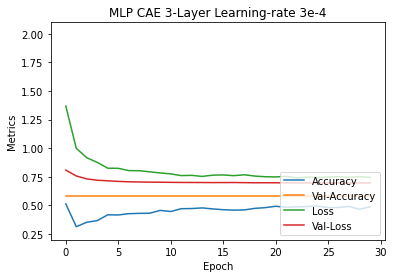

In [100]:
plt.plot(history33.history['accuracy'], label='Accuracy')
plt.plot(history33.history['val_accuracy'], label = 'Val-Accuracy')
plt.plot(history33.history['loss'], label = 'Loss')
plt.plot(history33.history['val_loss'], label = 'Val-Loss')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.2, 2.1])
plt.legend(loc='lower right')
plt.title('MLP CAE 3-Layer Learning-rate 3e-4')

In [102]:
test_loss, test_sparse_entropy, test_acc = model33.evaluate(test_img_ds,  verbose=2)
print(test_acc)

test_loss, test_sparse_entropy, test_acc = model33.evaluate(norm_test_img_ds,  verbose=2)
print(test_acc)

1/1 - 0s - loss: 0.7198 - Sparse_CategoricalCrossentropy: 0.7198 - accuracy: 0.5556 - 78ms/epoch - 78ms/step
0.5555555820465088
1/1 - 0s - loss: 0.7198 - Sparse_CategoricalCrossentropy: 0.7198 - accuracy: 0.5556 - 76ms/epoch - 76ms/step
0.5555555820465088


In [106]:
#Model 4 layer with learning rate 3e-4
model34 = models.Sequential()
model34.add(layers.Flatten(input_shape = (val_img_height, val_img_width, val_channels)))
model34.add(layers.Dense(512, activation='sigmoid'))
model34.add(layers.Dropout(0.3))
model34.add(layers.Dense(256, activation='sigmoid'))
model34.add(layers.Dropout(0.3))
model34.add(layers.Dense(128, activation='sigmoid'))
model34.add(layers.Dropout(0.3))
model34.add(layers.Dense(56, activation='sigmoid'))
model34.add(layers.Dropout(0.2))
model34.add(layers.Dense(2, activation = 'softmax'))
model34.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 9408)              0         
                                                                 
 dense_28 (Dense)            (None, 512)               4817408   
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 dropout_18 (Dropout)        (None, 128)             

In [107]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(val_learning_rate, decay_steps = val_steps_per_epochs, 
                                                             decay_rate=1, staircase=False)
optimizer = optimizers.Adam(lr_schedule)
callback = [tf.keras.callbacks.EarlyStopping(monitor='Sparse_CategoricalCrossentropy', patience=120)]

model34.compile(optimizer = optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, name='Sparse_CategoricalCrossentropy'),
                       'accuracy'])

history34 = model34.fit(norm_train_img_ds,  epochs = 30, validation_data=(norm_val_img_ds), 
                    batch_size = val_batch_size, callbacks = callback)

Epoch 1/30
43/43 [==============================] - 3s 47ms/step - loss: 1.0721 - Sparse_CategoricalCrossentropy: 1.0715 - accuracy: 0.4249 - val_loss: 0.7069 - val_Sparse_CategoricalCrossentropy: 0.7072 - val_accuracy: 0.4138
Epoch 2/30
43/43 [==============================] - 2s 40ms/step - loss: 0.7615 - Sparse_CategoricalCrossentropy: 0.7599 - accuracy: 0.4652 - val_loss: 0.6798 - val_Sparse_CategoricalCrossentropy: 0.6788 - val_accuracy: 0.5862
Epoch 3/30
43/43 [==============================] - 2s 41ms/step - loss: 0.7859 - Sparse_CategoricalCrossentropy: 0.7838 - accuracy: 0.4137 - val_loss: 0.6815 - val_Sparse_CategoricalCrossentropy: 0.6805 - val_accuracy: 0.5862
Epoch 4/30
43/43 [==============================] - 2s 40ms/step - loss: 0.7775 - Sparse_CategoricalCrossentropy: 0.7763 - accuracy: 0.4448 - val_loss: 0.6810 - val_Sparse_CategoricalCrossentropy: 0.6800 - val_accuracy: 0.5862
Epoch 5/30
43/43 [==============================] - 2s 41ms/step - loss: 0.7649 - Sparse_Cat

Text(0.5, 1.0, 'MLP CAE 4-Layer Learning-rate 3e-4')

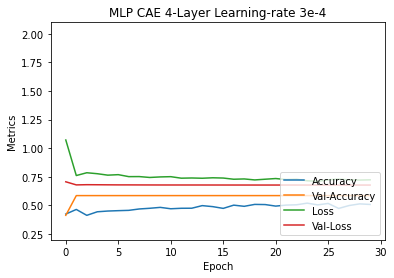

In [108]:
plt.plot(history34.history['accuracy'], label='Accuracy')
plt.plot(history34.history['val_accuracy'], label = 'Val-Accuracy')
plt.plot(history34.history['loss'], label = 'Loss')
plt.plot(history34.history['val_loss'], label = 'Val-Loss')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.2, 2.1])
plt.legend(loc='lower right')
plt.title('MLP CAE 4-Layer Learning-rate 3e-4')

In [109]:
test_loss, test_sparse_entropy, test_acc = model34.evaluate(test_img_ds,  verbose=2)
print(test_acc)

test_loss, test_sparse_entropy, test_acc = model34.evaluate(norm_test_img_ds,  verbose=2)
print(test_acc)

1/1 - 0s - loss: 0.6908 - Sparse_CategoricalCrossentropy: 0.6908 - accuracy: 0.5556 - 69ms/epoch - 69ms/step
0.5555555820465088
1/1 - 0s - loss: 0.6907 - Sparse_CategoricalCrossentropy: 0.6907 - accuracy: 0.5556 - 73ms/epoch - 73ms/step
0.5555555820465088


In [110]:
val_learning_rate = 0.0005

In [111]:
#Model 4 layer with learning rate 5e-4
model52 = models.Sequential()
model52.add(layers.Flatten(input_shape = (val_img_height, val_img_width, val_channels)))
model52.add(layers.Dense(512, activation='sigmoid'))
model52.add(layers.Dropout(0.3))
model52.add(layers.Dense(256, activation='sigmoid'))
model52.add(layers.Dropout(0.3))
model52.add(layers.Dense(128, activation='sigmoid'))
model52.add(layers.Dropout(0.3))
model52.add(layers.Dense(56, activation='sigmoid'))
model52.add(layers.Dropout(0.2))
model52.add(layers.Dense(2, activation = 'softmax'))
model52.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 9408)              0         
                                                                 
 dense_33 (Dense)            (None, 512)               4817408   
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               131328    
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_35 (Dense)            (None, 128)               32896     
                                                                 
 dropout_22 (Dropout)        (None, 128)             

In [112]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(val_learning_rate, decay_steps = val_steps_per_epochs, 
                                                             decay_rate=1, staircase=False)
optimizer = optimizers.Adam(lr_schedule)
callback = [tf.keras.callbacks.EarlyStopping(monitor='Sparse_CategoricalCrossentropy', patience=120)]

model52.compile(optimizer = optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, name='Sparse_CategoricalCrossentropy'),
                       'accuracy'])

history52 = model52.fit(norm_train_img_ds,  epochs = 30, validation_data=(norm_val_img_ds), 
                    batch_size = val_batch_size, callbacks = callback)

Epoch 1/30
43/43 [==============================] - 3s 48ms/step - loss: 1.2038 - Sparse_CategoricalCrossentropy: 1.1985 - accuracy: 0.4327 - val_loss: 0.6860 - val_Sparse_CategoricalCrossentropy: 0.6859 - val_accuracy: 0.5862
Epoch 2/30
43/43 [==============================] - 2s 44ms/step - loss: 0.7812 - Sparse_CategoricalCrossentropy: 0.7771 - accuracy: 0.4091 - val_loss: 0.6854 - val_Sparse_CategoricalCrossentropy: 0.6842 - val_accuracy: 0.5862
Epoch 3/30
43/43 [==============================] - 2s 41ms/step - loss: 0.8212 - Sparse_CategoricalCrossentropy: 0.8174 - accuracy: 0.3701 - val_loss: 0.6821 - val_Sparse_CategoricalCrossentropy: 0.6810 - val_accuracy: 0.5862
Epoch 4/30
43/43 [==============================] - 2s 43ms/step - loss: 0.7795 - Sparse_CategoricalCrossentropy: 0.7762 - accuracy: 0.4119 - val_loss: 0.6807 - val_Sparse_CategoricalCrossentropy: 0.6797 - val_accuracy: 0.5862
Epoch 5/30
43/43 [==============================] - 2s 41ms/step - loss: 0.7666 - Sparse_Cat

Text(0.5, 1.0, 'MLP CAE 4-Layer Learning-rate 5e-4')

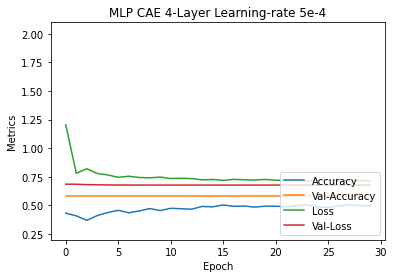

In [113]:
plt.plot(history52.history['accuracy'], label='Accuracy')
plt.plot(history52.history['val_accuracy'], label = 'Val-Accuracy')
plt.plot(history52.history['loss'], label = 'Loss')
plt.plot(history52.history['val_loss'], label = 'Val-Loss')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.2, 2.1])
plt.legend(loc='lower right')
plt.title('MLP CAE 4-Layer Learning-rate 5e-4')

In [114]:
test_loss, test_sparse_entropy, test_acc = model52.evaluate(test_img_ds,  verbose=2)
print(test_acc)

test_loss, test_sparse_entropy, test_acc = model52.evaluate(norm_test_img_ds,  verbose=2)
print(test_acc)

1/1 - 0s - loss: 0.6878 - Sparse_CategoricalCrossentropy: 0.6878 - accuracy: 0.5556 - 86ms/epoch - 86ms/step
0.5555555820465088
1/1 - 0s - loss: 0.6878 - Sparse_CategoricalCrossentropy: 0.6878 - accuracy: 0.5556 - 86ms/epoch - 86ms/step
0.5555555820465088


In [116]:
#Model 3 layer with learning rate 5e-4
model53 = models.Sequential()
model53.add(layers.Flatten(input_shape = (val_img_height, val_img_width, val_channels)))
model53.add(layers.Dense(512, activation='sigmoid'))
model53.add(layers.Dropout(0.3))
model53.add(layers.Dense(256, activation='sigmoid'))
model53.add(layers.Dropout(0.3))
model53.add(layers.Dense(128, activation='sigmoid'))
model53.add(layers.Dropout(0.2))
model53.add(layers.Dense(2, activation = 'softmax'))
model53.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 9408)              0         
                                                                 
 dense_38 (Dense)            (None, 512)               4817408   
                                                                 
 dropout_24 (Dropout)        (None, 512)               0         
                                                                 
 dense_39 (Dense)            (None, 256)               131328    
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_40 (Dense)            (None, 128)               32896     
                                                                 
 dropout_26 (Dropout)        (None, 128)             

In [117]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(val_learning_rate, decay_steps = val_steps_per_epochs, 
                                                             decay_rate=1, staircase=False)
optimizer = optimizers.Adam(lr_schedule)
callback = [tf.keras.callbacks.EarlyStopping(monitor='Sparse_CategoricalCrossentropy', patience=120)]

model53.compile(optimizer = optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, name='Sparse_CategoricalCrossentropy'),
                       'accuracy'])

history53 = model53.fit(norm_train_img_ds,  epochs = 30, validation_data=(norm_val_img_ds), 
                    batch_size = val_batch_size, callbacks = callback)

Epoch 1/30
43/43 [==============================] - 3s 49ms/step - loss: 1.3763 - Sparse_CategoricalCrossentropy: 1.3557 - accuracy: 0.5445 - val_loss: 1.0912 - val_Sparse_CategoricalCrossentropy: 1.0862 - val_accuracy: 0.5862
Epoch 2/30
43/43 [==============================] - 2s 41ms/step - loss: 1.2071 - Sparse_CategoricalCrossentropy: 1.1936 - accuracy: 0.2570 - val_loss: 0.7412 - val_Sparse_CategoricalCrossentropy: 0.7390 - val_accuracy: 0.5862
Epoch 3/30
43/43 [==============================] - 2s 41ms/step - loss: 0.8751 - Sparse_CategoricalCrossentropy: 0.8685 - accuracy: 0.3367 - val_loss: 0.7205 - val_Sparse_CategoricalCrossentropy: 0.7186 - val_accuracy: 0.5862
Epoch 4/30
43/43 [==============================] - 2s 40ms/step - loss: 0.8380 - Sparse_CategoricalCrossentropy: 0.8329 - accuracy: 0.3743 - val_loss: 0.7098 - val_Sparse_CategoricalCrossentropy: 0.7080 - val_accuracy: 0.5862
Epoch 5/30
43/43 [==============================] - 2s 42ms/step - loss: 0.8038 - Sparse_Cat

Text(0.5, 1.0, 'MLP CAE 3-Layer Learning-rate 5e-4')

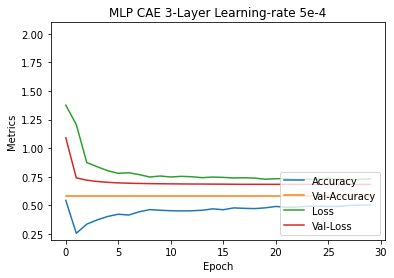

In [118]:
plt.plot(history53.history['accuracy'], label='Accuracy')
plt.plot(history53.history['val_accuracy'], label = 'Val-Accuracy')
plt.plot(history53.history['loss'], label = 'Loss')
plt.plot(history53.history['val_loss'], label = 'Val-Loss')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.2, 2.1])
plt.legend(loc='lower right')
plt.title('MLP CAE 3-Layer Learning-rate 5e-4')

In [119]:
test_loss, test_sparse_entropy, test_acc = model53.evaluate(test_img_ds,  verbose=2)
print(test_acc)

test_loss, test_sparse_entropy, test_acc = model53.evaluate(norm_test_img_ds,  verbose=2)
print(test_acc)

1/1 - 0s - loss: 0.7013 - Sparse_CategoricalCrossentropy: 0.7013 - accuracy: 0.5556 - 73ms/epoch - 73ms/step
0.5555555820465088
1/1 - 0s - loss: 0.7010 - Sparse_CategoricalCrossentropy: 0.7010 - accuracy: 0.5556 - 75ms/epoch - 75ms/step
0.5555555820465088


In [120]:
#Model 2 layer with learning rate 5e-4
model54 = models.Sequential()
model54.add(layers.Flatten(input_shape = (val_img_height, val_img_width, val_channels)))
model54.add(layers.Dense(512, activation='sigmoid'))
model54.add(layers.Dropout(0.3))
model54.add(layers.Dense(256, activation='sigmoid'))
model54.add(layers.Dropout(0.2))
model54.add(layers.Dense(2, activation = 'softmax'))
model54.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 9408)              0         
                                                                 
 dense_42 (Dense)            (None, 512)               4817408   
                                                                 
 dropout_27 (Dropout)        (None, 512)               0         
                                                                 
 dense_43 (Dense)            (None, 256)               131328    
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 dense_44 (Dense)            (None, 2)                 514       
                                                                 
Total params: 4,949,250
Trainable params: 4,949,250
N

In [121]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(val_learning_rate, decay_steps = val_steps_per_epochs, 
                                                             decay_rate=1, staircase=False)
optimizer = optimizers.Adam(lr_schedule)
callback = [tf.keras.callbacks.EarlyStopping(monitor='Sparse_CategoricalCrossentropy', patience=120)]

model54.compile(optimizer = optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, name='Sparse_CategoricalCrossentropy'),
                       'accuracy'])

history54 = model54.fit(norm_train_img_ds,  epochs = 30, validation_data=(norm_val_img_ds), 
                    batch_size = val_batch_size, callbacks = callback)

Epoch 1/30
43/43 [==============================] - 3s 46ms/step - loss: 1.4112 - Sparse_CategoricalCrossentropy: 1.3874 - accuracy: 0.6823 - val_loss: 2.7683 - val_Sparse_CategoricalCrossentropy: 2.7547 - val_accuracy: 0.5862
Epoch 2/30
43/43 [==============================] - 2s 40ms/step - loss: 2.3064 - Sparse_CategoricalCrossentropy: 2.2703 - accuracy: 0.2254 - val_loss: 1.0373 - val_Sparse_CategoricalCrossentropy: 1.0327 - val_accuracy: 0.5862
Epoch 3/30
43/43 [==============================] - 2s 42ms/step - loss: 1.2949 - Sparse_CategoricalCrossentropy: 1.2764 - accuracy: 0.2718 - val_loss: 0.9134 - val_Sparse_CategoricalCrossentropy: 0.9096 - val_accuracy: 0.5862
Epoch 4/30
43/43 [==============================] - 2s 40ms/step - loss: 1.1423 - Sparse_CategoricalCrossentropy: 1.1284 - accuracy: 0.2676 - val_loss: 0.8681 - val_Sparse_CategoricalCrossentropy: 0.8646 - val_accuracy: 0.5862
Epoch 5/30
43/43 [==============================] - 2s 39ms/step - loss: 1.0155 - Sparse_Cat

Text(0.5, 1.0, 'MLP CAE 2-Layer Learning-rate 5e-4')

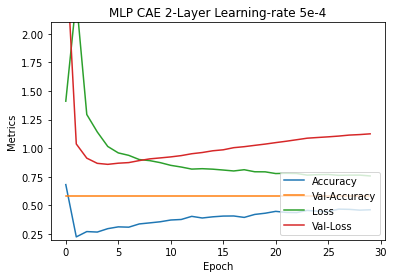

In [122]:
plt.plot(history54.history['accuracy'], label='Accuracy')
plt.plot(history54.history['val_accuracy'], label = 'Val-Accuracy')
plt.plot(history54.history['loss'], label = 'Loss')
plt.plot(history54.history['val_loss'], label = 'Val-Loss')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.2, 2.1])
plt.legend(loc='lower right')
plt.title('MLP CAE 2-Layer Learning-rate 5e-4')

In [123]:
test_loss, test_sparse_entropy, test_acc = model54.evaluate(test_img_ds,  verbose=2)
print(test_acc)

test_loss, test_sparse_entropy, test_acc = model54.evaluate(norm_test_img_ds,  verbose=2)
print(test_acc)

1/1 - 0s - loss: 1.1964 - Sparse_CategoricalCrossentropy: 1.1964 - accuracy: 0.5556 - 71ms/epoch - 71ms/step
0.5555555820465088
1/1 - 0s - loss: 1.2001 - Sparse_CategoricalCrossentropy: 1.2001 - accuracy: 0.5556 - 71ms/epoch - 71ms/step
0.5555555820465088
